# Customers

In [1]:
import data_analysis.customers_analysis as cs
customers_df = cs.read_customer_data()
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [2]:
cs.unique_elements_per_column_customers(customers_df=customers_df)
# let's extract the cool custoemrs
cool_customers = cs.get_cool_customers(customers_df=customers_df)
cool_customers.head()

##########
the column: 'customer_id' column has 99441 unique values
##########
the column: 'customer_unique_id' column has 96096 unique values
##########
the column: 'customer_zip_code_prefix' column has 14994 unique values
##########
the column: 'customer_city' column has 4119 unique values
##########
the column: 'customer_state' column has 27 unique values


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,count
910,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17
3718,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17
3078,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17
2294,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17
5319,f5188d99e9281e214a4a7d1b139a8229,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,17


In [3]:
cs.customers_repeated_purchases(customers_df=customers_df)

Let's consider customers that used the platform multiple times
out of 96096 customers, only 2997 ordered at least 2 times:3.1188 % of the customer base
out of 96096 customers, only 19 ordered at least 4 times:0.0198 % of the customer base


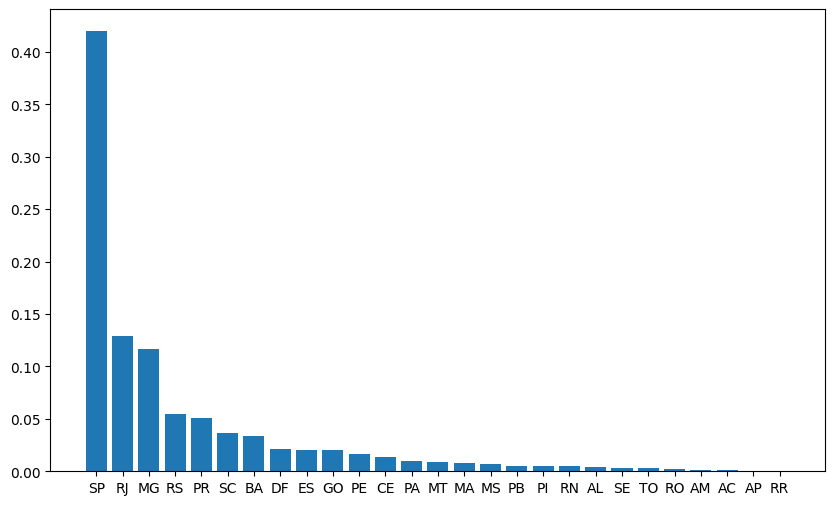

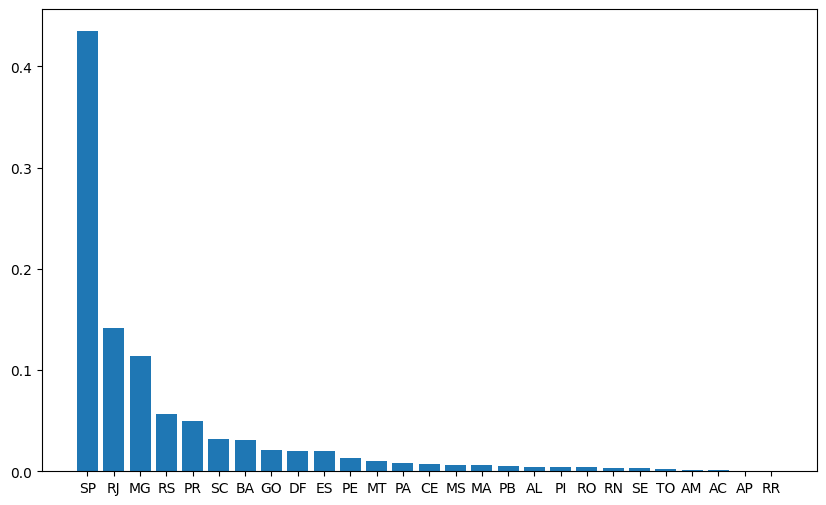

In [4]:
cs.visualize_customers_distribution_per_state(customer_df=customers_df, figsize=(10, 6))
cs.visualize_cool_customers_distribution_per_state(cool_customers=cool_customers, figsize=(10, 6))

# State, customer, spendings ??
1. Is the average spending significantly different from one state to another

2. are sellers making more profit from same-state orders or across state orders ??

## Average spending

In [5]:
import payments_analysis as pa
payments_df = pa.read_payments_csv()
payments_df.head()

,pay
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [6]:
orders_df = pa.read_orders_csv()
orders_df.head()

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c


In [8]:
customer_pay, sp_pay, mg_pay, rj_pay = pa.aggregate_spendings_by_state(orders_df=orders_df, payments_df=payments_df, customers_df=customers_df) 

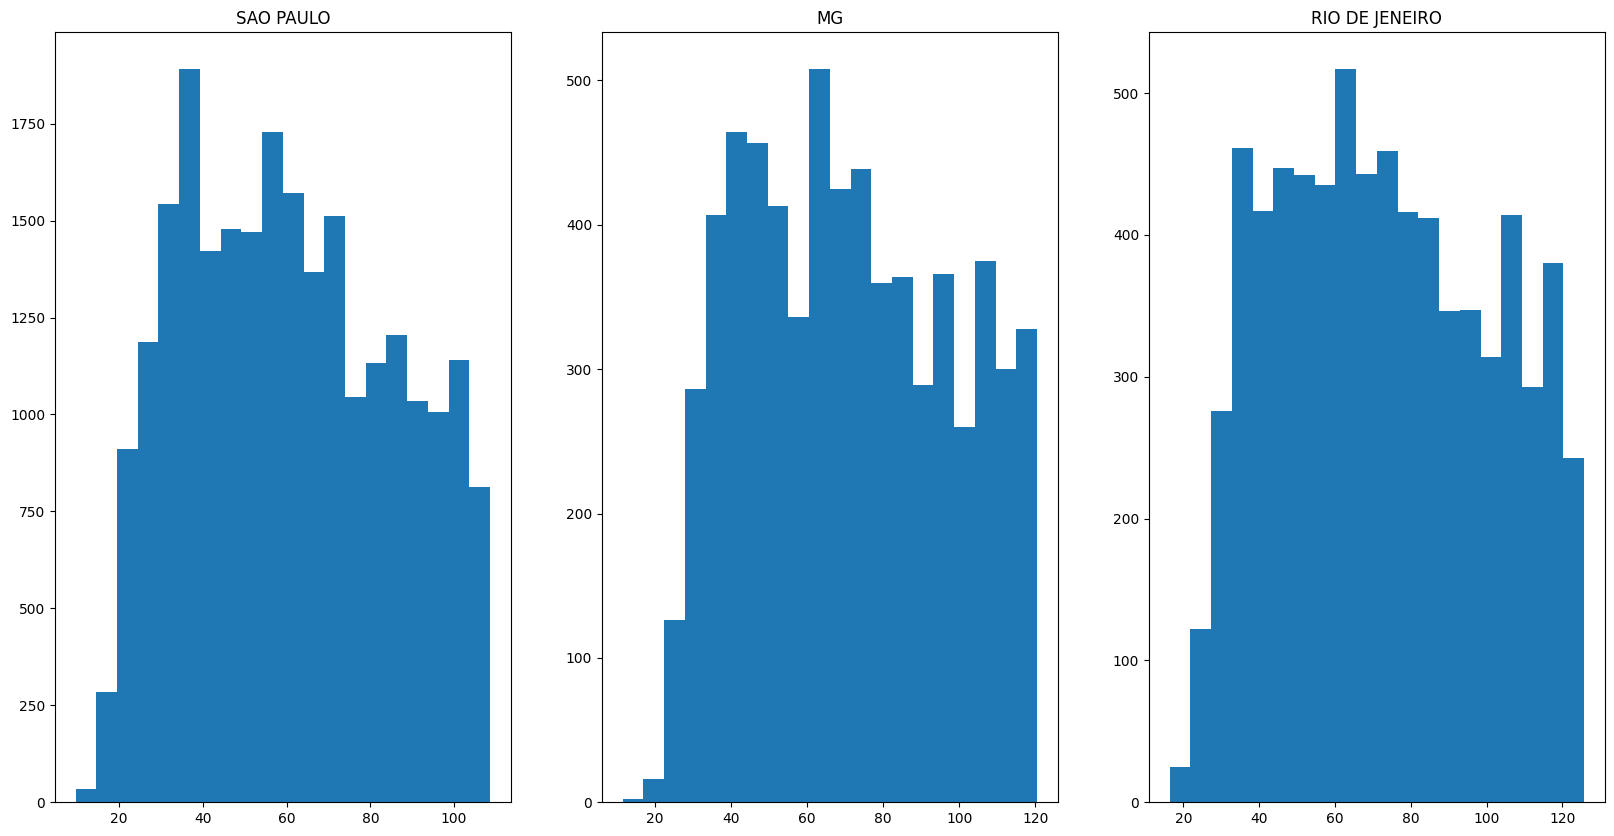

In [9]:
sp_pay_filtered, mg_pay_filtered, rj_pay_filtered  = pa.analyze_average_spending_per_state(sp_pay=sp_pay, mg_pay=mg_pay, rj_pay=rj_pay)

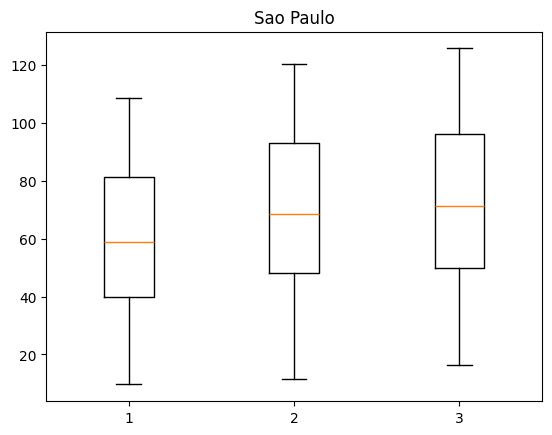

In [10]:
# let's visualize them in a boxplot
pa.box_plot_spending_by_state(sp_pay_filtered=sp_pay_filtered,
                              mg_pay_filtered=mg_pay_filtered,
                              rj_pay_filtered=rj_pay_filtered)

In [ ]:
# TODO: try to prove normal distribution with a test!!

so far the visualization suggests that there is no significant difference in the average spending across the different states !!

## Same-state profits VS cross-state Prices

In [1]:
import sellers_analysis as sa

sellers_df = sa.read_seller_csv()
order_items_df = sa.read_order_items_csv()
multi_seller_products = sa.analyze_product_per_seller(order_item_df=order_items_df, display=True)

The total number of products sold: 32951
The number of products sold by at least 2 sellers: 1225
That's only: 3.7176 %


In [2]:
multi_seller_orders = sa.prepare_multi_seller_price_data(order_item_df=order_items_df, 
                                                        sellers_df=sellers_df, 
                                                        multi_seller_products=multi_seller_products)

sp_rj_average_product_price = sa.average_product_price_by_state(multi_seller_orders_df=multi_seller_orders,
                                                                state1="SP", 
                                                                state2="RJ")
print(sp_rj_average_product_price.head())

                         product_id          SP          RJ
0  e1bf2f209fd2b08e1af3ed71732d9008  169.900000  168.721429
1  0f2fd0a589cb7849c1dbedbd4109c2f8   51.750000   48.900000
2  595fac2a385ac33a80bd5114aec74eb8  120.984783  117.860000
3  4cb33e9787e8a38b82bd68e70f5f4700  243.370000  229.900000
4  81a3d1dc085d3226530f23cd4af5030b   36.900000   29.990000


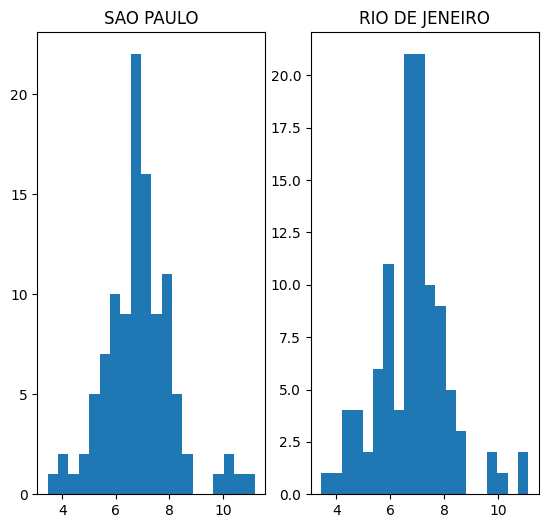

In [6]:
from statsmodels.distributions.empirical_distribution import ECDF as smart_ecdf
import numpy as np

sp_ap, rj_ap = np.log2(sp_rj_average_product_price['SP']), np.log2(sp_rj_average_product_price['RJ'])

import matplotlib.pyplot as plt
figsize = (10, 6)
fig = plt.figure(figsize=figsize) 
fig.add_subplot(1, 3, 1)
plt.hist(sp_ap, bins=20)
plt.title('SAO PAULO')

fig.add_subplot(1, 3, 2)
plt.hist(rj_ap, bins=20)
plt.title("RIO DE JENEIRO")
plt.show()

In [8]:
var_sp, var_rj = np.std(sp_ap), np.std(rj_ap)
print(var_sp, var_rj)

1.2805871376176716 1.2808557510442906


running normality test with different random states:   0%|          | 0/5 [00:00<?, ?it/s]

running normality test with different random states: 100%|██████████| 5/5 [00:00<00:00, 41.65it/s]


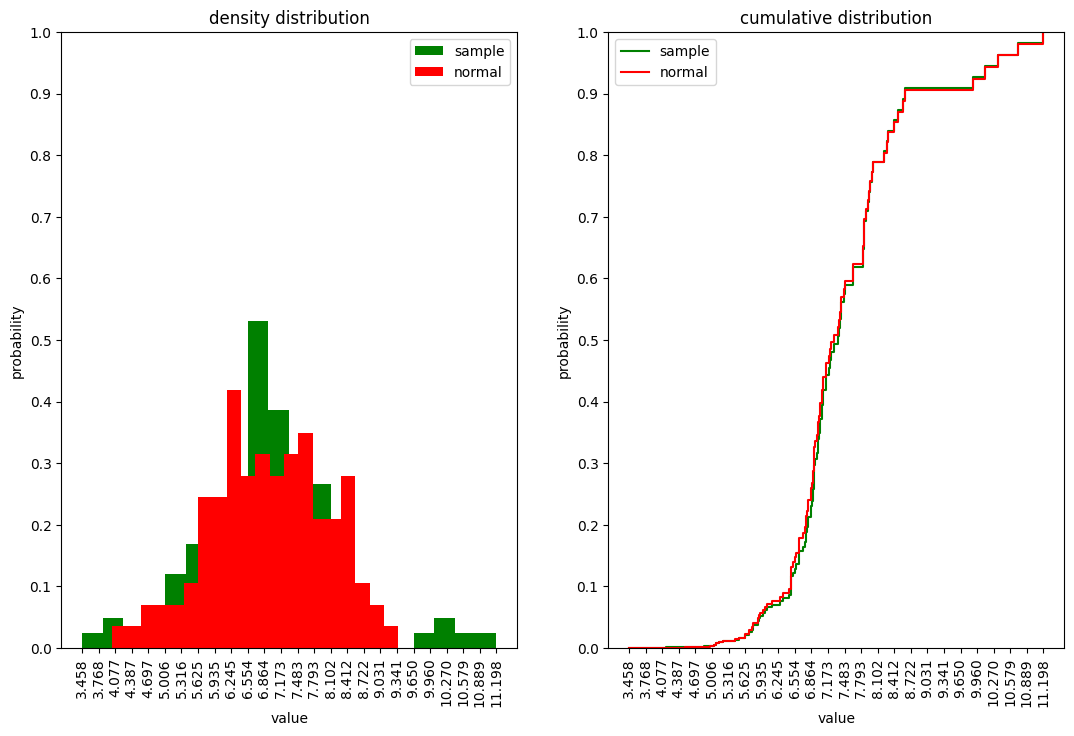

In [4]:
from stats_utils import test_sample_normal_distribution
sp_normal_p = test_sample_normal_distribution(sample=sp_ap, display=True) 
rj_normal_p = test_sample_normal_distribution(sample=rj_ap, display=True) 

In [12]:
# we will assume that standard deviation is equal between the 2 samples
from scipy.stats import ttest_rel 
ttest_rel(a=sp_ap, b=rj_ap)

TtestResult(statistic=-0.1944973497569895, pvalue=0.846158748289082, df=106)

with a pvalue of 0.86, we are positive that the same product is (on average) sold with the same price by 2 sellers in Sao Paulo and those in Rio De Janeiro 